<a href="https://colab.research.google.com/github/Irina-Na/Trial_tasks_EDGAR/blob/main/EDGAR_filling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDGAR_tasks:

1. Определите наиболее удобный способ программно получать список поданных за день форм, автоматизируйте процесс загрузки данных и подготовки их для анализа.

Preview: 

For downloads I will use open library https://pypi.org/project/python-edgar/ 
Install it by pip in a virtualenv: 
pip install python-edgar

Notes:
the current official filing date (including filings made after the 5:30 pm deadline on the previous filing day). Note: Filings may be made Monday through Friday (except for U.S. Federal Holidays). 

So, for regular runing the download script need use time-bonds scheduler.


2. Проведите анализ частотности форм за первый квартал 2021 года: постройте таблицы как числа форм каждого конкретного типа, так и числа компаний по которым подана хоть одна форма каждого типа. По топ-10 наиболее популярным формам, постройте графики этих величин в зависимости от дня квартала.

Owerview: See in Task 2. Made frequency analyze 

3. Разбейте топ-10 наиболее часто встречающихся форм на четыре группы, по степени машинной читаемости (низкая/высокая) и по важности с точки зрения нахождения справедливой цены компании (низкая/высокая). Опишите своими словами, что заставило вас категоризировать каждый тип формы таким образом.

Owerview: See in Task 3. Ran a qualitative analysis

## Task1. Download fillings list 
can be executed by script (in main directory on github repo)
For this notebook we made one-time download

In [1]:
!pip install python-edgar

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, time, date
import calendar
import matplotlib

from matplotlib import pyplot as plt
import edgar   #for index download https://github.com/edgarminers/python-edgar  https://pypi.org/project/python-edgar/

In [7]:
now = dt.datetime.now()

download_directory='/content/sample_data/index'
edgar.download_index(download_directory, now.year, skip_all_present_except_last=True) #for daily download in script skip_all_present_except_last=True

quarter=(now.month-1)//3+1
file_path='/content/sample_data/index/'+str(now.year)+'-QTR'+str(quarter)+'.tsv'
file_path

'/content/sample_data/index/2021-QTR2.tsv'

In [10]:
df = pd.read_csv(file_path, sep='|', names=[ 'Company_CIK', 'Company_name', 'Filling_type', 'Filling_date','Filling_URL1',  'Filling_URL2'])
df.head()

,Company_CIK,Company_name,Filling_type,Filling_date,Filling_URL1,Filling_URL2
0,1000045,NICHOLAS FINANCIAL INC,8-K,2021-06-02,edgar/data/1000045/0001564590-21-031267.txt,edgar/data/1000045/0001564590-21-031267-index....
1,1000097,"KINGDON CAPITAL MANAGEMENT, L.L.C.",13F-HR,2021-05-17,edgar/data/1000097/0001000097-21-000005.txt,edgar/data/1000097/0001000097-21-000005-index....
2,1000152,"WESTERN INTERNATIONAL SECURITIES, INC.",X-17A-5,2021-04-01,edgar/data/1000152/0001000152-21-000004.txt,edgar/data/1000152/0001000152-21-000004-index....
3,1000177,NORDIC AMERICAN TANKERS Ltd,20-F,2021-04-29,edgar/data/1000177/0001140361-21-014948.txt,edgar/data/1000177/0001140361-21-014948-index....
4,1000177,NORDIC AMERICAN TANKERS Ltd,6-K,2021-04-09,edgar/data/1000177/0000919574-21-002826.txt,edgar/data/1000177/0000919574-21-002826-index....


In [9]:
last_update=df.sort_values('Filling_date', ascending=False)['Filling_date'].iloc[0]
print('The latest updates are available from', last_update )
df=df[(df['Filling_date'] == last_update)]
df.Filling_date.describe()

The latest updates are available from 2021-06-04


count           4183
unique             1
top       2021-06-04
freq            4183
Name: Filling_date, dtype: object

In [12]:
df.to_csv("/content/sample_data/daily_index_update.csv")
print('Prepaired dataset with the latest daily index upload in path')

Prepaired dataset with last available fillings index load in path


## Task 2. Made frequency analyze 


In [13]:
df1 = pd.read_csv('/content/sample_data/index/2021-QTR1.tsv', sep='|', names=[ 'Company_CIK', 'Company_name', 'Filling_type', 'Filling_date','Filling_URL1',  'Filling_URL2'])

In [14]:
freq_df=pd.DataFrame(df1.Filling_type.value_counts())
freq_df.rename(columns={ 'Filling_type': 'Filling_volume'}, inplace=True)
freq_df['Filling_type']=freq_df.index
freq_df['Company_count']=freq_df.Filling_type.apply(lambda x:  df1.Company_name [df1.Filling_type.isin([x]) ].nunique() ) 
freq_df=freq_df[[ 'Filling_volume', 'Company_count']]
freq_df.head(10)

,Filling_volume,Company_count
4,133902,38814
SC 13G/A,27474,6912
424B2,23001,537
8-K,18499,5944
3,14643,9303
NPORT-P,11804,1926
SC 13G,11026,4650
D,9384,9040
13F-HR,5970,5874
6-K,5862,905


In [15]:
freq_df.sort_values(['Company_count'], ascending=False).head(10)

,Filling_volume,Company_count
4,133902,38814
3,14643,9303
D,9384,9040
SC 13G/A,27474,6912
8-K,18499,5944
13F-HR,5970,5874
10-K,5519,5443
D/A,5691,5373
SC 13G,11026,4650
5,4055,2657


In [16]:
top_volume_fill=list(freq_df.sort_values(['Filling_volume'], ascending=False).index)[:10]
top_company_fill=list(freq_df.sort_values(['Company_count'], ascending=False).index)[:10]
print('Top-10 fillings on volume : ', top_volume_fill)
print('Top-10 fillings on company : ', top_company_fill)

Top-10 fillings on volume :  ['4', 'SC 13G/A', '424B2', '8-K', '3', 'NPORT-P', 'SC 13G', 'D', '13F-HR', '6-K']
Top-10 fillings on company :  ['4', '3', 'D', 'SC 13G/A', '8-K', '13F-HR', '10-K', 'D/A', 'SC 13G', '5']


### Conclusion
  Popularity - is the demand for more people. And second - we need information about more companies. So we can use 'Top-10 fillings on company'. To check this idea, will have a look on content of each filling in this two lists.

- *424B2, 6-K, NPORT-P*	- many fillings from a little part of companys;

- *10-K, D/A, 5* -  many companys fillings this type form one-time.

  Research of this form type shows that:

- *D and D/A, SC 13G and SC 13G/A * - have the same specification.

-  *424B2, 6-K, NPORT-P * - have important information.

  *5* - will not use form due to not critical data (compared to other forms in the top 10), the SEC has narrowed the use of Form 5: transactions with the company, including option issuances, cancellations, regrants, and repricings, as well as exercises, now require two-day reporting on Form 4. The future of Form 5 is unclear.

  *13F* - form due not trusted info. Studies have found the "widespread presence of significant reporting errors" in the 13F submissions. The SEC itself has acknowledged that 13F filings are not necessarily reliable because no one at the SEC analyzes the content for accuracy and completeness. 

  And both because of an outdated fillings time.
  
  

Instead of  13F I'd rather analyze the 10-Q form. But there aren't many this type forms filled out in this quarter. And so for the purpose of evaluating the company value, rather than copying the investment strategy, we may use 13F form.

  **Will analyse this form types: 3, 4, 6-K, 8-K, 10-K, 424B2, NPORT_P, 13F-HR. And we should merge data for types: D and D/A, and for SC 13G and SC 13G/A.**





In [17]:
df1.Filling_type[df1.Filling_type.isin(['D/A'])]='D'
df1.Filling_type[df1.Filling_type.isin(['SC 13G/A'])]='SC 13G'
print(df1.Filling_type.value_counts().head(10))
top_fill_type=df1.Filling_type.value_counts().head(10).index
top_fill_type

4          133902
SC 13G      38500
424B2       23001
8-K         18499
D           15075
3           14643
NPORT-P     11804
13F-HR       5970
6-K          5862
10-K         5519
Name: Filling_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['4', 'SC 13G', '424B2', '8-K', 'D', '3', 'NPORT-P', '13F-HR', '6-K',
       '10-K'],
      dtype='object')

### Get graths
For this task will use time-series.

In [18]:
df1.Filling_date=df1.Filling_date.apply(pd.to_datetime)
df1.set_index('Filling_date', inplace=True )

Daily fillings volume


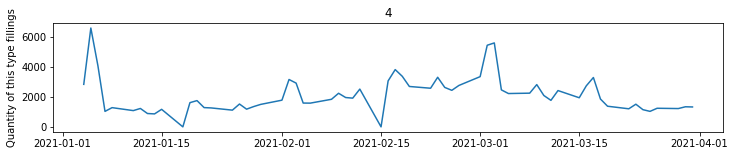

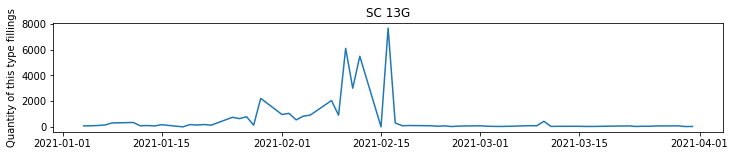

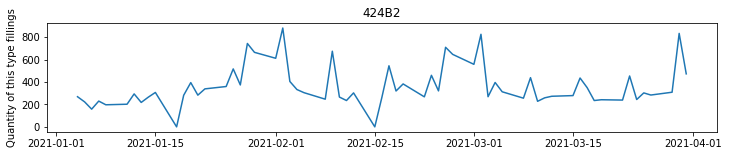

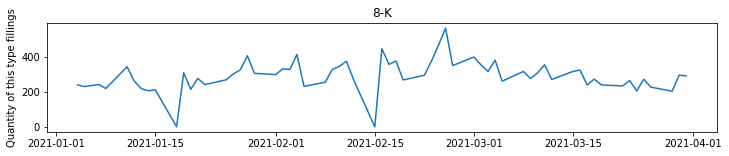

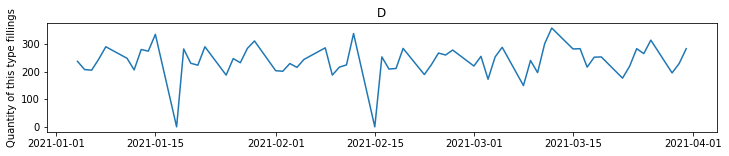

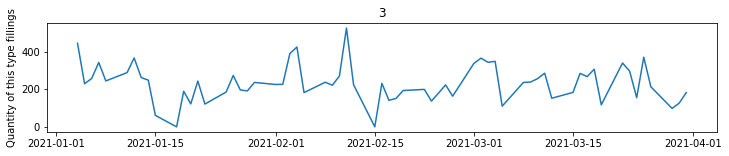

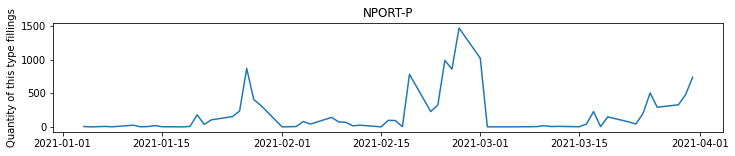

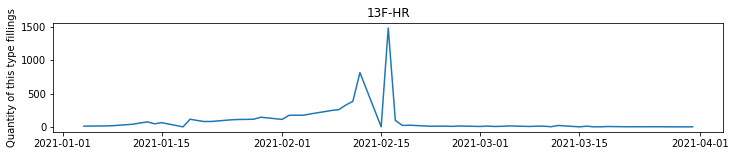

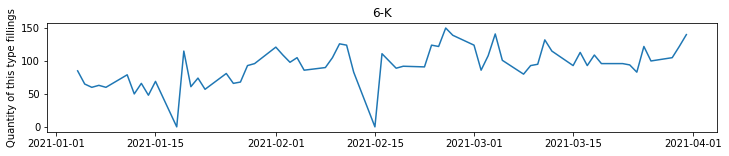

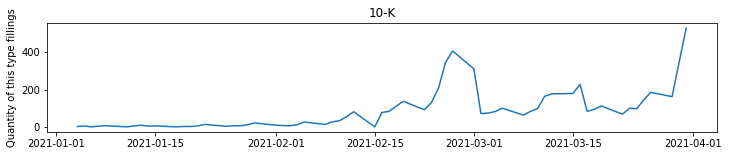

In [19]:
print('Daily fillings volume')

for filling in top_fill_type:
    fig = plt.subplots(figsize=(12, 2))
    plt.plot(df1.Company_name[df1.Filling_type.isin([filling])].resample('B').count() )
    plt.ylabel('Quantity of this type fillings')
    plt.title(filling)
    plt.show()

Daily fillings by company


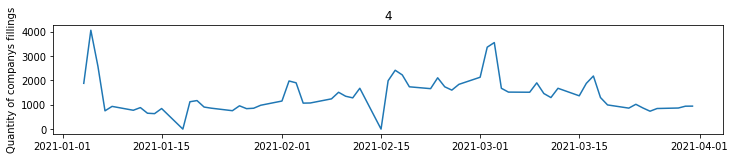

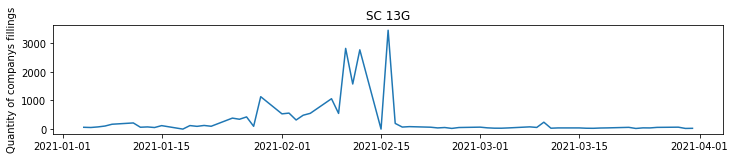

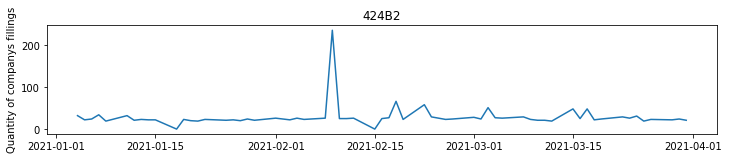

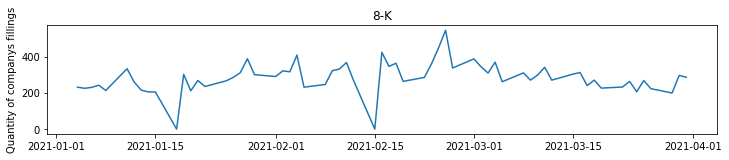

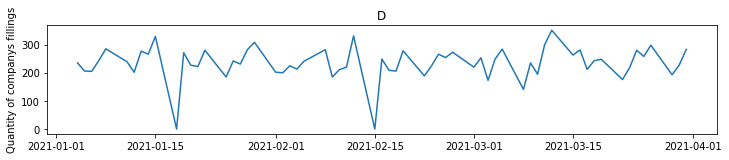

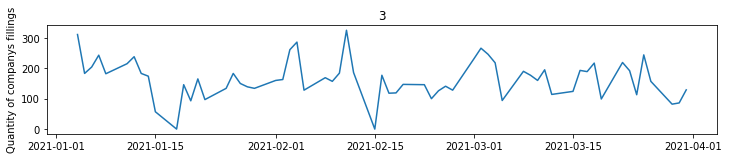

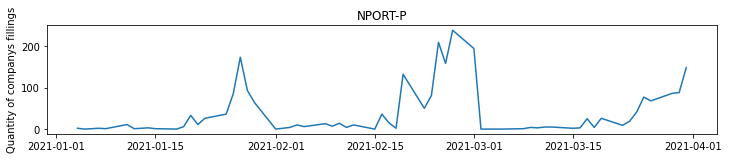

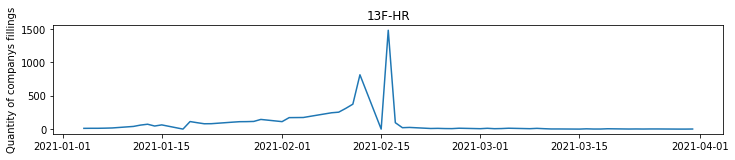

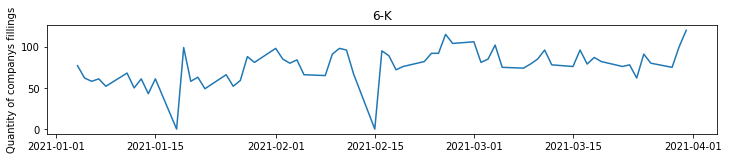

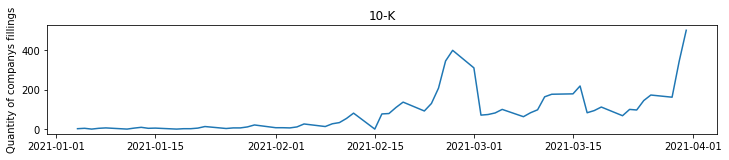

In [20]:
print('Daily fillings by company')

for filling in top_fill_type:
    fig = plt.subplots(figsize=(12, 2))
    plt.plot(df1.Company_name[df1.Filling_type.isin([filling])].resample('B').nunique() )
    plt.ylabel('Quantity of companys fillings')
    plt.title(filling)
    plt.show()

## Task3. Qualitative analysis


In [21]:
top_fill_type

Index(['4', 'SC 13G', '424B2', '8-K', 'D', '3', 'NPORT-P', '13F-HR', '6-K',
       '10-K'],
      dtype='object')

По машинной читаемости я бы распределила формы следующм образом:

**Самая низкая:** 6-K (из-за отсуствия стандартизации внутренней отчетности в разных странах), 8-K (из-за невозможности учесть всю информацию, которую компания может пожелать сообщить инвесторам форма часто содержит неупорядоченные тексты, ссылки, а приложения к форме может содержать презентации, пресс-релизы, тп.).

**Низкая:** 10-K (из-за крупных описательных разделов, содержащих критическую информацию:оценка бизнеса, риски и комментарии менеджмента). 424B2 - пресс-релизы в индивидульном формате у каждой компании.

**Высокая:** 3, 4 (вся информация выделена по полям, но сложно по должности и ФИО определить степень критичности инсайдера, а также выше вероятность ошибки(например при указании кода операции P-покупка вместо другой).

**Самая высокая:** D, 13G, 13F-HR, NPORT-P - вся информация выделена по полям, в основном цифры, коды и стандартизованные названия.


По важности я бы распределила формы следующм образом:

**Очень высокая важность**: 10-K - большой обьем критичной информации, 8-K -  достоверная информация из первых рук о резких изменениях в компании, 4 - если по этой форме идет приобретение ЦБ.

**Высокая важность:** 6-K - позволяет инвесторам получить доступ к информации, который получают инвесторы на внутреннем рынке иностранной компании, 3,4- может говорить о негативных изменених (если инсайдер резко продает) или стабильности (если держит не смотря на новости), 424B2 - о выпуске новых ЦБ, критичнее важны если это первичное размещение( выход на IPO), NPORT-P -  по этой фрме отчетности можно получить как информацию о стабильности самого фонда, так и о его инвестичионных стратегиях.

**Низкая важность:** 13G - содежит информацию о покупке свыше 5%стоимости компании, D - позволяет узнать о сделках не размещаемых на рынке и показателях продаваемо компании. Обе бумаги дают частичную информацию, которая иногда оказывается критичной при оценке стоимости компании.

**Очень низкая важность:** мне кажется такой информации в топ 10 просто не может быть))) Но поскольку, например, информация в 13F-HR не проверяется SEC и часто использовалась мошенниками, она не является достоверной или достаточной, чтобы опираться на нее в принятии инвестиционных решений.

